In [21]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

## Inicio
Abrir imagen

image_2


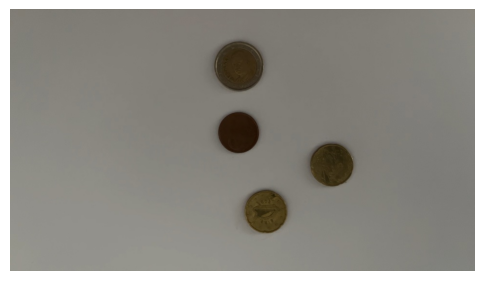

In [22]:
img_files = glob('imagenes/*jpg')

img_num = 1
img_n = os.path.basename(img_files[img_num]).split('.')[0]
print(img_n)

img = cv2.imread(f'imagenes/{img_n}.jpg')

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

## cambiar a escala de gris y threshold

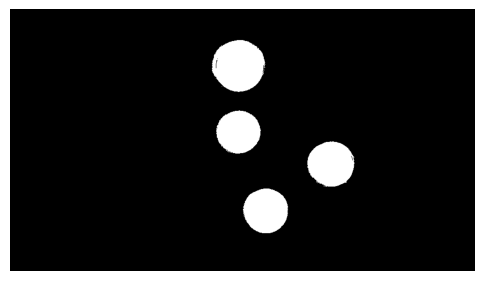

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

## morphologyEx
eliminar pequeñas áreas de ruido en una imagen binaria

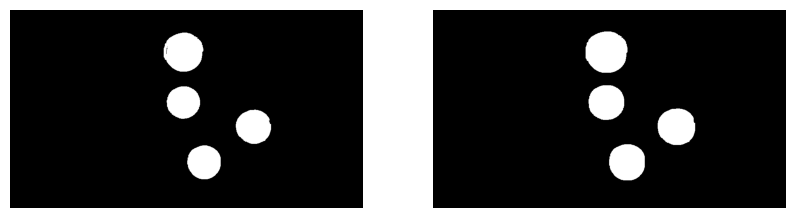

In [24]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) 

sure_bg = cv2.dilate(opening, kernel, iterations=3)

f, ax = plt.subplots(1,2,figsize=(10, 8))
ax[0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(sure_bg, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
plt.show()

## distanceTransform
Distancia del píxel blanco más cercano a un píxel negro (contorno más cercano)

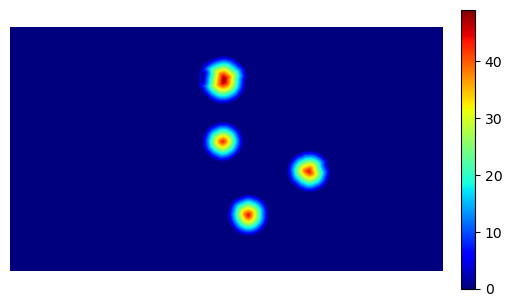

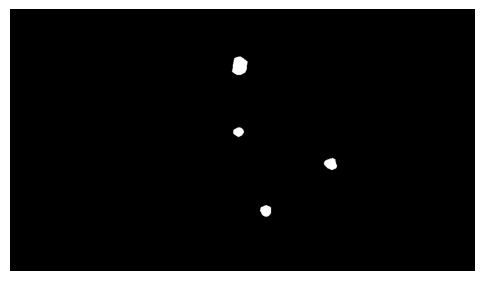

In [25]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(dist_transform, cmap='jet')
ax.axis('off')
cbar = f.colorbar(im, fraction=.03, pad=0.04)    # Añade la barra de colores
# cbar.ax.tick_params(labelsize=0)  
# cbar.set_ticks([])
plt.show()

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sure_fg, cmap='gray')
ax.axis('off')
plt.show()

sure_fg: claramente diferenciados del fondo

sure_bg: se consideran definitivamente como fondo

unknown: no están claramente clasificadas como primer plano ni como fondo

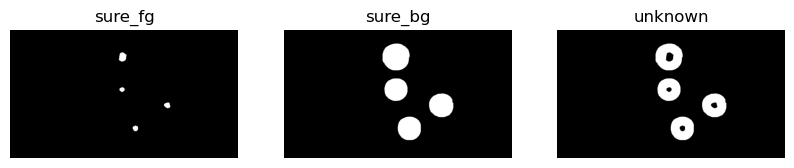

In [26]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

f, ax = plt.subplots(1,3, figsize=(10, 6))
ax[0].imshow(sure_fg, cmap='gray')
ax[0].axis('off')
ax[0].set_title('sure_fg')
ax[1].imshow(sure_bg, cmap='gray')
ax[1].axis('off')
ax[1].set_title('sure_bg')
ax[2].imshow(unknown, cmap='gray')
ax[2].axis('off')
ax[2].set_title('unknown')
plt.show()

## connectedComponents
Identifica y etiqueta componentes conectados en una imagen binaria.

Al fondo se etiqueta como 0

[0 1 2 3 4]
5
[1 2 3 4 5]


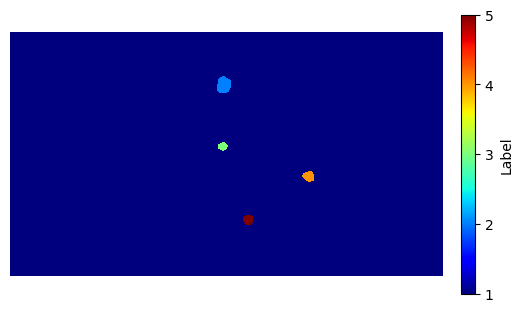

In [27]:
n_labels, labels = cv2.connectedComponents(sure_fg)

print(np.unique(labels))
print(n_labels)
labels = labels+1
print(np.unique(labels))

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(labels, cmap='jet', interpolation='nearest')
f.colorbar(im, ax=ax, label='Label', ticks=np.arange(labels.max() + 1), fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()


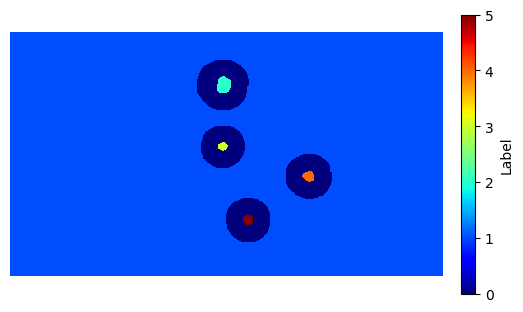

In [28]:
labels[unknown==255] = 0

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(labels, cmap='jet', interpolation='nearest')
f.colorbar(im, ax=ax, label='Label', ticks=np.arange(labels.max() + 1), fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()

[-1  1  2  3  4  5]


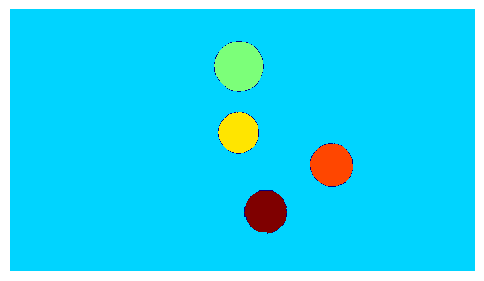

In [29]:
# El valor -1 indica que el píxel pertenece a la línea de división o borde entre diferentes regiones
# intenta encontrar "líneas de división" (o "bordes") en la imagen
labels = cv2.watershed(img, labels) 

print(np.unique(labels))

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(labels, cmap='jet', interpolation='nearest')
ax.axis('off')
plt.show()

## Resultado

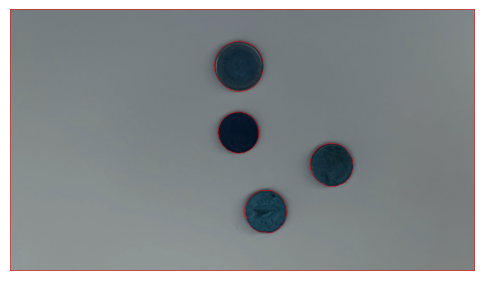

In [30]:
img[labels==-1] = [255, 0, 0]
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')
plt.show()